In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score



In [ ]:
#mount drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Loading image data and augmenting</h1>

In [74]:
train_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/train',
                                                     target_size=(256, 256),
                                                     batch_size=32,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(256, 256),
                                                     batch_size=32,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen.class_indices)
print(test_gen.class_indices)

Found 5112 images belonging to 3 classes.
Found 1143 images belonging to 3 classes.
{'healthy': 0, 'mildew': 1, 'rust': 2}
{'healthy': 0, 'mildew': 1, 'rust': 2}


<h2>Custom CNN Model </h2>

In [ ]:
model = Sequential()
#first conv layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', input_shape = (256, 256, 3)))
model.add(Activation('relu'))
#first maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#second conv layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
#second maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#third convolutional layer
model.add(Conv2D(filters = 64, kernel_size =(3, 3)))
model.add(Activation('relu'))
#third maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#fourth convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
model.add(Activation('relu'))
#fourth maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#fifth convolutional
model.add(Conv2D(filters = 256, kernel_size = (3, 3)))
#fully connected component

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 activation (Activation)     (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [ ]:
history = model.fit_generator(
    train_gen, epochs = 50, validation_data = test_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
160/160 [==============================] - 1760s 11s/step - loss: 0.7813 - accuracy: 0.6107 - val_loss: 0.6486 - val_accuracy: 0.7568
Epoch 2/50
160/160 [==============================] - 114s 716ms/step - loss: 0.6296 - accuracy: 0.7586 - val_loss: 0.6107 - val_accuracy: 0.7620
Epoch 3/50
160/160 [==============================] - 115s 718ms/step - loss: 0.5221 - accuracy: 0.8104 - val_loss: 0.3576 - val_accuracy: 0.8880
Epoch 4/50
160/160 [==============================] - 115s 718ms/step - loss: 0.3949 - accuracy: 0.8691 - val_loss: 0.2997 - val_accuracy: 0.8985
Epoch 5/50
160/160 [==============================] - 115s 717ms/step - loss: 0.3482 - accuracy: 0.8914 - val_loss: 0.7183 - val_accuracy: 0.7060
Epoch 6/50
160/160 [==============================] - 113s 706ms/step - loss: 0.2339 - accuracy: 0.9169 - val_loss: 0.0638 - val_accuracy: 0.9781
Epoch 7/50
160/160 [==============================] - 115s 718ms/step - loss: 0.0942 - accuracy: 0.9695 - val_loss: 0.0905 - 

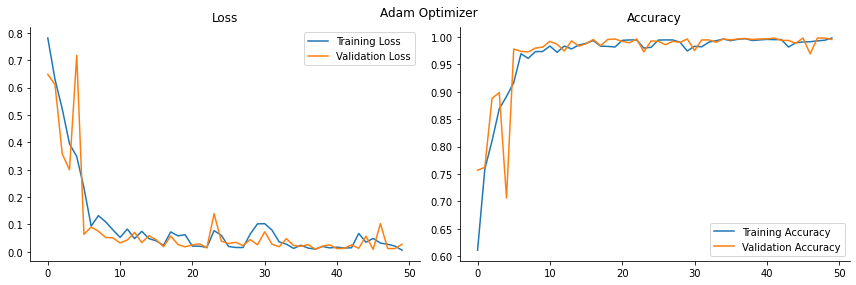

In [71]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("Adam Optimizer")

plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
model.save_weights('weights')

<h2> Confusion Matrix</h2>

In [80]:
test_gen_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(256, 256),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 1143 images belonging to 3 classes.


In [81]:
y_pred = model.predict_generator(test_gen_new)
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


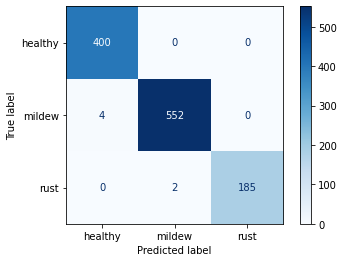

In [82]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [84]:
accuracy_score(test_gen_new.classes, y_pred)

0.994750656167979